In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from karateclub import Graph2Vec, GL2Vec, FeatherNode, AE
import networkx as nx
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pylab as plt
from pyvis.network import Network
import json
from networkx.readwrite import json_graph


scl = StandardScaler()

# Get artifact graph

In [2]:
with open('./response.json', 'rb') as f:
    train = json.load(f)

In [3]:
train

{'directed': True,
 'graph': {},
 'links': [{'source': '620e23b1fa6f2a6930756a13',
   'target': '620e23b1fa6f2a6930756a14',
   'properties': {'eventID': 4672,
    'recordNumber': 91,
    'computerName': 'WIN-GLAOI6CVLUC',
    'accountName': 'SYSTEM',
    'accountDomain': 'NT AUTHORITY',
    'securityID': 'S-1-5-18',
    'logonID': '0x3e7',
    'privilegeList': 'SeAssignPrimaryTokenPrivilege\r\n\t\t\tSeTcbPrivilege\r\n\t\t\tSeSecurityPrivilege\r\n\t\t\tSeTakeOwnershipPrivilege\r\n\t\t\tSeLoadDriverPrivilege\r\n\t\t\tSeBackupPrivilege\r\n\t\t\tSeRestorePrivilege\r\n\t\t\tSeDebugPrivilege\r\n\t\t\tSeAuditPrivilege\r\n\t\t\tSeSystemEnvironmentPrivilege\r\n\t\t\tSeImpersonatePrivilege\r\n\t\t\tSeDelegateSessionUserImpersonatePrivilege',
    'timeString': '2021-04-27T10:11:54.169837Z',
    'time': '2021-04-27T10:11:54',
    'timestamp': 1619518314}},
  {'source': '620e23b1fa6f2a6930756a13',
   'target': '620e23b1fa6f2a6930756a14',
   'properties': {'eventID': 4672,
    'recordNumber': 89,
  

# Convert artifacts graph to networkx and postprocess

In [4]:
G = json_graph.node_link_graph(train)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
G.remove_nodes_from(list(nx.isolates(G)))
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)

# Get communities in graph

Counter({1: 173, 14: 63, 12: 34, 13: 32, 5: 25, 16: 21, 2: 8, 3: 6, 0: 5, 7: 4, 6: 3, 17: 3, 15: 3, 8: 2, 9: 2, 10: 2, 11: 2, 4: 2})


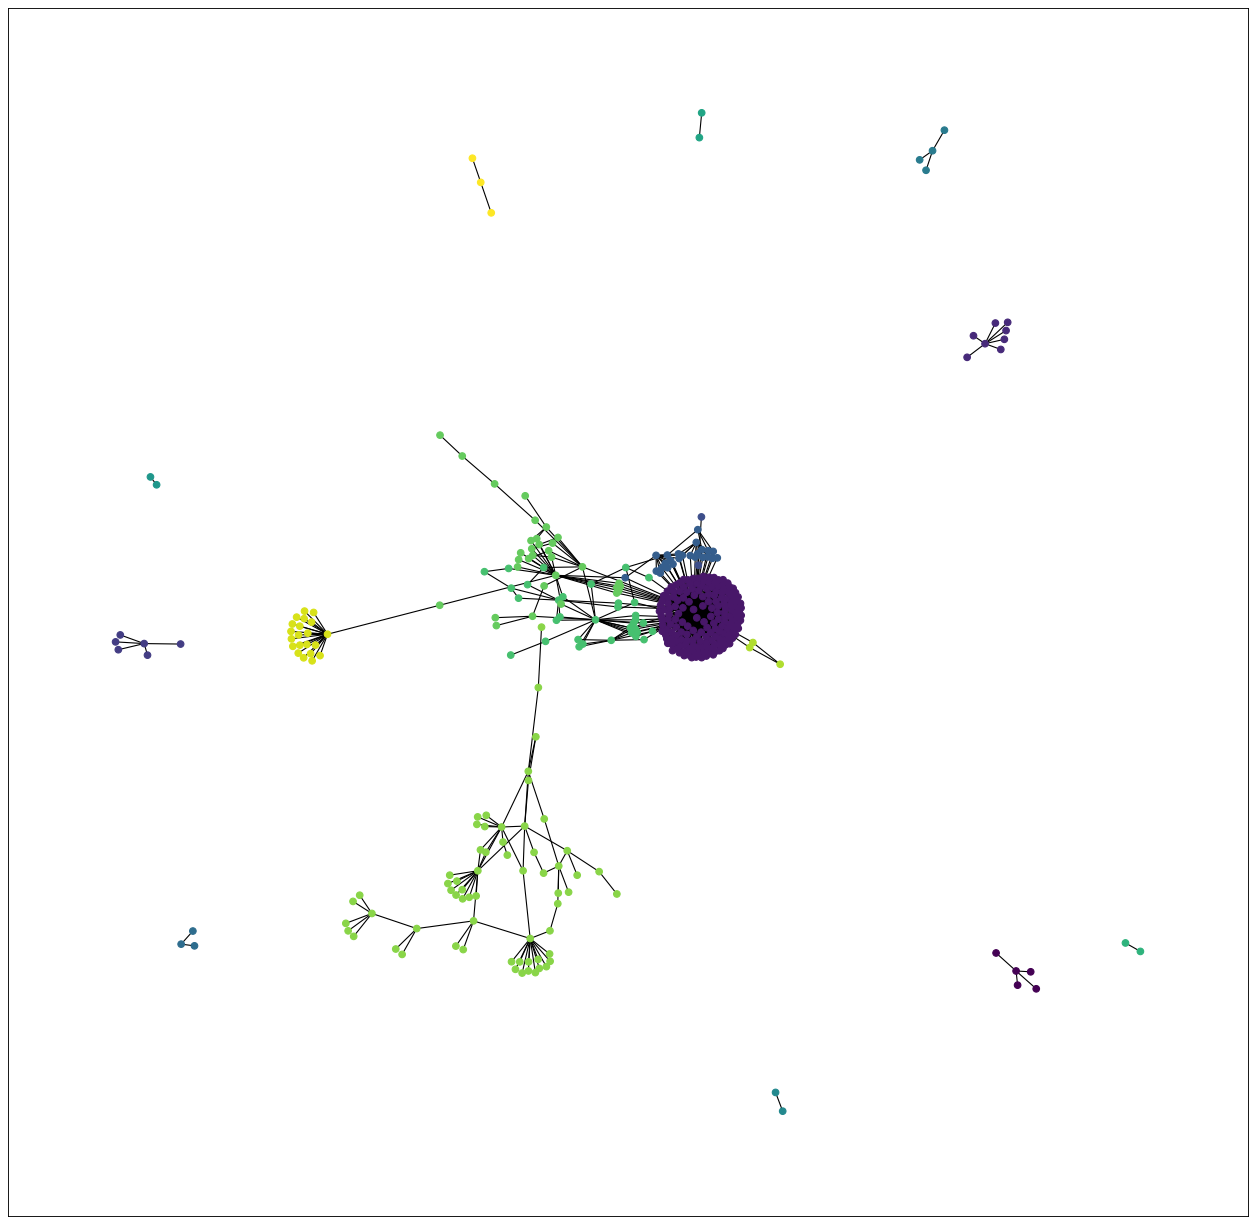

In [5]:
import community
import collections

partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)
print(counter)
plt.figure(figsize=(20,20), dpi=80)
sp = nx.spring_layout(G, scale=200)
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=35, node_color=values)
plt.show()

# Since not enough graph, get community subgraph

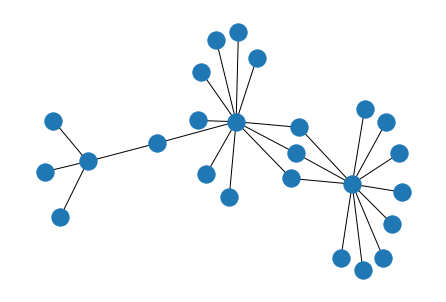

In [6]:
G1_node = [node for node,community in partition.items() if community == 5]
G1 = G.subgraph(G1_node).copy()
G1 = nx.convert_node_labels_to_integers(G1, first_label=0, ordering='default', label_attribute=None)
nx.draw(G1)

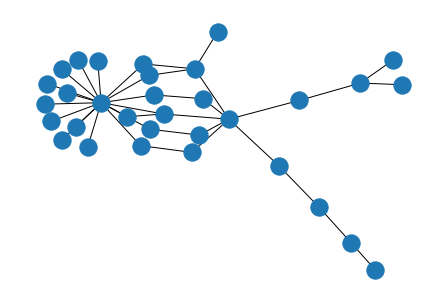

In [7]:
G2_node = [node for node,community in partition.items() if community == 13]
G2 = G.subgraph(G2_node).copy()
G2 = nx.convert_node_labels_to_integers(G2, first_label=0, ordering='default', label_attribute=None)
nx.draw(G2)

In [8]:
G3_node = [node for node,community in partition.items() if community == 11]
G3 = G.subgraph(G3_node).copy()
G3 = nx.convert_node_labels_to_integers(G3, first_label=0, ordering='default', label_attribute=None)

G4_node = [node for node,community in partition.items() if community == 16]
G4 = G.subgraph(G4_node).copy()
G4 = nx.convert_node_labels_to_integers(G4, first_label=0, ordering='default', label_attribute=None)

G5_node = [node for node,community in partition.items() if community == 12]
G5 = G.subgraph(G5_node).copy()
G5 = nx.convert_node_labels_to_integers(G5, first_label=0, ordering='default', label_attribute=None)


# Visualise overlaping edges
https://stackoverflow.com/questions/61421491/similarity-measure-between-graphs-using-networkx

In [33]:
G = G5
H = G5
GH = nx.compose(G,H)

In [39]:
G_atr_list = [vals for u,v, x in G.edges(data=True) for vals in x['properties'].values() if not isinstance(vals, list)]
H_atr_list = [vals for u,v, x in H.edges(data=True) for vals in x['properties'].values() if not isinstance(vals, list)]
intersec = list(set(G_atr_list) & set(H_atr_list))

# similarity edge logic and colour
edge_colors = dict()
for u, v, attr in GH.edges(data=True):
    if all(k in intersec for k in attr['properties'].values()):
        GH[u][v]['color'] = 'magenta'
        GH[u][v]['size'] = 5
        continue
        
    if G.has_edge(u,v):
        GH[u][v]['color'] = 'lightgreen'
        GH[u][v]['width'] = 3
        
    if H.has_edge(u,v):
        GH[u][v]['color'] = 'lightblue'
        GH[u][v]['width'] = 3
        
        

# similarity node logic and colour
# G_nodes = set(G.nodes())
# H_nodes = set(H.nodes())
# node_colors = []
# for node in GH.nodes():
#     if node in G_nodes:
#         if node in H_nodes:
#             node_colors.append('lightgreen')
#             continue
#         node_colors.append('lightgreen')
#     if node in H_nodes:
#         node_colors.append('lightblue')

# React graph rendering
https://danielcaldas.github.io/react-d3-graph/sandbox/index.html

In [40]:
json_graph.node_link_data(GH)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0, 'asd': 'DESKTOP-BEARI'},
  {'id': 1, 'asd': 'DESKTOP-BEARI'},
  {'id': 2, 'asd': 'DESKTOP-BEARI'},
  {'id': 3, 'asd': 'DESKTOP-BEARI'},
  {'id': 4, 'asd': 'DESKTOP-BEARI'},
  {'id': 5, 'asd': 'DESKTOP-BEARI'},
  {'id': 6, 'asd': 'DESKTOP-BEARI'},
  {'id': 7, 'asd': 'DESKTOP-BEARI'},
  {'id': 8, 'asd': 'DESKTOP-BEARI'},
  {'id': 9, 'asd': 'DESKTOP-BEARI'},
  {'id': 10, 'asd': 'DESKTOP-BEARI'},
  {'id': 11, 'asd': 'DESKTOP-BEARI'},
  {'id': 12, 'asd': 'DESKTOP-BEARI'},
  {'id': 13, 'asd': 'DESKTOP-BEARI'},
  {'id': 14, 'asd': 'DESKTOP-BEARI'},
  {'id': 15, 'asd': 'DESKTOP-BEARI'},
  {'id': 16, 'asd': 'DESKTOP-BEARI'},
  {'id': 17, 'asd': 'DESKTOP-BEARI'},
  {'id': 18, 'asd': 'DESKTOP-BEARI'},
  {'id': 19, 'asd': 'DESKTOP-BEARI'},
  {'id': 20, 'asd': 'DESKTOP-BEARI'},
  {'id': 21, 'asd': 'DESKTOP-BEARI'},
  {'id': 22, 'asd': 'DESKTOP-BEARI'},
  {'id': 23, 'asd': 'DESKTOP-BEARI'},
  {'id': 24, 'asd': 'DESKTOP-BEAR

# Pyviz styling
> https://pyvis.readthedocs.io/en/latest/_modules/pyvis/network.html?highlight=group#

In [20]:
nt = Network('1000px', '2000px', directed=False)
nt.from_nx(GH)
nt.show('nx.html')

# Similarity

In [133]:
from sklearn.metrics.pairwise import cosine_similarity
import itertools

In [134]:
G1 = nx.Graph()
G1.add_edges_from([(0, 1), (1, 2)])
G1.add_edges_from([(3, 2), (2, 1)])

G2 = nx.Graph()
G2.add_edges_from([(0, 1), (1, 2)])
G2.add_edges_from([(2, 1), (1, 3)])

H1 = nx.Graph()
H1.add_edges_from([(0, 3), (3, 2)])
H1.add_edges_from([(2, 3), (3,1)])

H2 = nx.Graph()
H2.add_edges_from([(1, 3), (3, 2)])
H2.add_edges_from([(0, 3), (3, 2)])


I = nx.Graph()
I.add_edges_from([(0, 1), (1, 2)])
I.add_edges_from([(2, 3), (3,1)])

graphlist = [G1, G2, H1,H2, I]
caseIDlist = ['s1','s2','s3','s4','s5']

In [136]:
# Get graph embedding
graphembedmodel = Graph2Vec(dimensions=2)
graphembedmodel.fit(graphlist)
graphembedlist = graphembedmodel.get_embedding()
# get graph normalised
graphembedlist = scl.fit_transform(graphembedlist)

# zip caseid and graph embedding to create pairs combinition
zipgraph_case = zip(caseIDlist, graphembedlist)
zipgraph_case_pairs = itertools.combinations(zipgraph_case,2)

# Iterate and compare similarity, then store in DB
for c1, c2 in zipgraph_case_pairs:
    simscore = cosine_similarity([c1[1]] , [c2[1]]).squeeze()
    if simscore > 0.80:
        #Store caseid into intell db['similarity']
        print(c1[0], c2[0])

s3 s5


In [ ]:
# another similarirty matrix
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

print(jaccard_similarity(G1, G2))

# Run classification

In [166]:
graphlist = [G1,G2,G3,G4,G5]

graphembedmodel = Graph2Vec(dimensions=32)
graphembedmodel.fit(graphlist)
graph_embedding_list = graphembedmodel.get_embedding()

In [171]:
train_X = graph_embedding_list[:4]
train_X = scl.fit_transform(train_X)
train_Y = [1,1,2,2]

test_X = graph_embedding_list[4]
test_X = scl.transform([test_X])
test_Y = [1]

In [172]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(train_X, train_Y)
print(list(clf.predict(test_X)))
print(train_Y)

[1]
[1, 1, 2, 2]
